In [1]:
import numpy as np
import pandas as pd
from statistics import mode
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns
import re
from scipy import stats

<a id="section_toc"></a> 
## ÍNDICE

[Dataset](#section_dataset)

[Data Information](#section_dataInformation)

[A/B Test](#section_AB_test)

$\hspace{0.5cm}$[Graphics](#section_graphicsBer)

[Mean Opinion Score](#section_MOS)

$\hspace{.5cm}$[Statistical Parameters Audio](#section_statAudio)

$\hspace{1cm}$[Female Artificial Audios](#section_femaleArt)

$\hspace{1cm}$[Female Natural Audios](#section_femaleNat)

$\hspace{1.5cm}$[Graphics Female](#section_graphicsFemale)

$\hspace{1cm}$[Male Artificial Audios](#section_maleArt)
    
$\hspace{1cm}$[Male Natural Audios](#section_maleNat)
    
$\hspace{1.5cm}$[Graphics Male](#section_graphicsMale)

[Correlation](#section_correlation)

<a id="section_dataset"></a> 

## Dataset

[Volver a TOC](#section_toc)

In [2]:
data = pd.read_excel('Formulario sin título (respuestas).xlsx')
print(data.shape)
data = data.dropna(axis=1, how='all')
print(data.shape)
data.head()
#data.to_csv('prueba.csv')

(40, 95)
(40, 94)


,Marca_temporal,Female_audio1_choice,Pronunciation_female_artificial_voice1,Accentuation_female_artificial_voice1,Naturalness_female_artificial_voice1,Cadence_female_artificial_voice1,Pronunciation_female_natural_voice1,Accentuation_female_natural_voice1,Naturalness_female_natural_voice1,Cadence_female_natural_voice1,...,Accentuation_male_natural_voice2,Naturalness_male_natural_voice2,Cadence_male_natural_voice2,Pronunciation_male_artificial_voice2,Accentuation_male_artificial_voice2,Naturalness_male_artificial_voice2,Cadence_male_artificial_voice2,Rango_de_edad,Estudios_académicos,Nivel_de_Inglés
0,2021-05-25 15:40:57.253,Voz 1,3,3,4,3,4,4,3,4,...,3,4,3,4,4,4,4,20 a 25 años,Universitario incompleto,Bajo
1,2021-05-25 15:43:26.070,Voz 2,3,2,2,2,3,3,3,3,...,5,4,5,3,4,4,5,30 a 35 años,Terciario completo,Intermedio
2,2021-05-25 15:54:21.380,Voz 2,5,5,2,1,5,4,4,4,...,4,5,5,5,5,1,4,25 a 30 años,Universitario incompleto,Intermedio
3,2021-05-25 16:16:14.014,Voz 2,5,5,3,3,5,5,5,5,...,5,5,5,5,5,3,3,25 a 30 años,Universitario incompleto,Avanzado
4,2021-05-25 16:28:12.733,Voz 2,3,5,2,3,3,5,4,5,...,5,5,5,5,4,4,5,25 a 30 años,Terciario incompleto,Estoy haciendo el profesorado de Inglés en el ...


In [3]:
data.describe()

,Pronunciation_female_artificial_voice1,Accentuation_female_artificial_voice1,Naturalness_female_artificial_voice1,Cadence_female_artificial_voice1,Pronunciation_female_natural_voice1,Accentuation_female_natural_voice1,Naturalness_female_natural_voice1,Cadence_female_natural_voice1,Pronunciation_male_artificial_voice5,Accentuation_male_artificial_voice5,...,Naturalness_female_natural_voice3,Cadence_female_natural_voice3,Pronunciation_male_natural_voice2,Accentuation_male_natural_voice2,Naturalness_male_natural_voice2,Cadence_male_natural_voice2,Pronunciation_male_artificial_voice2,Accentuation_male_artificial_voice2,Naturalness_male_artificial_voice2,Cadence_male_artificial_voice2
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,4.075000,3.750000,2.800000,2.875000,4.475000,4.300000,4.150000,4.000000,3.900000,3.825000,...,3.600000,3.750000,4.425000,4.250000,4.350000,4.225000,3.950000,3.775000,3.075000,3.575000
std,0.997111,1.080123,0.966092,1.180775,0.715667,0.790975,0.921259,0.905822,1.057331,1.083383,...,1.172331,1.080123,0.780779,0.980581,0.769615,0.831665,1.218448,1.250385,1.268706,1.217132
min,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,...,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,3.750000,3.000000,3.000000,2.000000,3.000000
50%,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,5.000000,5.000000,4.500000,4.000000,4.500000,4.000000,3.000000,4.000000
75%,5.000000,5.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<a id="section_dataInformation"></a> 

## Data Information

[Volver a TOC](#section_toc)

In [4]:
data_information = data.loc[:,['Rango_de_edad','Estudios_académicos','Nivel_de_Inglés']]
data_information.iloc[4:5,2:3] = 'Avanzado'
data_information.head()

,Rango_de_edad,Estudios_académicos,Nivel_de_Inglés
0,20 a 25 años,Universitario incompleto,Bajo
1,30 a 35 años,Terciario completo,Intermedio
2,25 a 30 años,Universitario incompleto,Intermedio
3,25 a 30 años,Universitario incompleto,Avanzado
4,25 a 30 años,Terciario incompleto,Avanzado


In [5]:
data_age = data_information.Rango_de_edad.value_counts()
data_age = pd.DataFrame(data_age)
data_age['Total'] = 40
data_age
data_age['Relative_freq'] = (data_age['Rango_de_edad'] / data_age.Total)*100
data_age.reset_index(inplace=True)
data_age.sort_values (by=['index'],inplace= True)
data_age['index'] = ['20 to 24 years','25 to 29 years','30 to 34 years','Older than 50 years']
data_age




,index,Rango_de_edad,Total,Relative_freq
1,20 to 24 years,16,40,40.0
0,25 to 29 years,17,40,42.5
2,30 to 34 years,5,40,12.5
3,Older than 50 years,2,40,5.0


In [6]:
labels = data_age.Relative_freq.apply(str)
labels_age = labels.apply(lambda x: x + ' %')

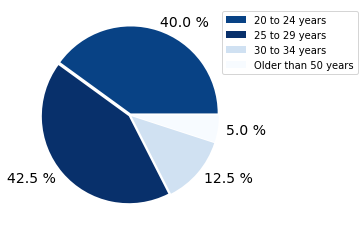

In [7]:
normdata = colors.Normalize(min(data_age.Relative_freq), max(data_age.Relative_freq))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(data_age.Relative_freq))
#colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
fig,ax = plt.subplots(figsize=(6,4))
ax.pie(data_age.Relative_freq, labels=labels_age,colors = colores,
        textprops={'fontsize': 14},explode = (0.02,0.02,0.02,0.02)) #autopct="%0.1f %%"
#plt.axis('equal')
ax.legend(labels=data_age['index'],bbox_to_anchor=(0.9, 1))
plt.show()

In [8]:
data_level = data_information.Nivel_de_Inglés.value_counts()
data_level = pd.DataFrame(data_level)
data_level['Total'] = 40
#data_level
data_level['Relative_freq'] = (data_level['Nivel_de_Inglés'] / data_level.Total)*100
data_level.reset_index(inplace=True)
#data_level.sort_values (by=['index'],inplace= True,ascending= False)
data_level['index'] = ['Intermediate','Advanced','Low']
data_level

,index,Nivel_de_Inglés,Total,Relative_freq
0,Intermediate,18,40,45.0
1,Advanced,14,40,35.0
2,Low,8,40,20.0


In [9]:
data_level_int = data_level.Relative_freq.apply(int)
labels = data_level_int.apply(str)
labels_level = labels.apply(lambda x: x + ' %')

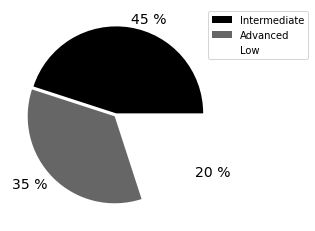

In [10]:
normdata = colors.Normalize(min(data_level.Relative_freq), max(data_level.Relative_freq))
colormap = cm.get_cmap("gray_r")
colores =colormap(normdata(data_level.Relative_freq))
plt.pie(data_level.Relative_freq, labels = labels_level, textprops={'fontsize': 14},
        colors = colores, explode = (0.02,0.02,0.02)) #['#DB845B', '#5B73DB','#76D625']
#plt.axis('equal')
plt.legend(labels=data_level['index'],bbox_to_anchor=(0.9, 1))
plt.show()

<a id="section_AB_test"></a> 

## A/B Test

[Volver a TOC](#section_toc)

In [11]:
index_col = ['Female_audio1_choice', 'Female_audio2_choice', 'Female_audio3_choice','Female_audio4_choice',
             'Female_audio5_choice','Male_audio1_choice','Male_audio2_choice','Male_audio3_choice','Male_audio4_choice',
             'Male_audio5_choice']

data_bernoulli = data.loc[:,index_col]  
data_bernoulli.head()

,Female_audio1_choice,Female_audio2_choice,Female_audio3_choice,Female_audio4_choice,Female_audio5_choice,Male_audio1_choice,Male_audio2_choice,Male_audio3_choice,Male_audio4_choice,Male_audio5_choice
0,Voz 1,Voz 2,No encuentro diferencias,Voz 2,Voz 2,Voz 1,Voz 1,Voz 1,No encuentro diferencias,Voz 1
1,Voz 2,Voz 1,Voz 2,Voz 1,Voz 1,Voz 2,Voz 1,Voz 1,Voz 2,Voz 2
2,Voz 2,Voz 1,Voz 2,Voz 1,Voz 2,Voz 2,Voz 1,Voz 1,Voz 1,Voz 2
3,Voz 2,Voz 1,Voz 2,Voz 1,Voz 2,Voz 2,Voz 1,Voz 2,No encuentro diferencias,Voz 2
4,Voz 2,Voz 1,Voz 2,Voz 2,Voz 2,No encuentro diferencia,Voz 1,No encuentro diferencias,No encuentro diferencias,Voz 2


In [12]:
mask_voice1 = data_bernoulli == 'Voz 1'
mask_voice2 = data_bernoulli == 'Voz 2'
mask_not_dif = np.logical_or(data_bernoulli == 'No encuentro diferencia', data_bernoulli == 'No encuentro diferencias')
count_voice1 = pd.DataFrame(mask_voice1.sum())
count_voice2 = pd.DataFrame(mask_voice2.sum())
count_not_dif = pd.DataFrame(mask_not_dif.sum())

data_merge = pd.merge(count_voice1, count_voice2, left_index=True, right_index=True)
data_merge = data_merge.rename(columns = {'0_x':'Count_voice1','0_y':'Count_voice2'})
data_merge2 = pd.merge(data_merge,count_not_dif,left_index=True, right_index=True)
data_ber = pd.merge(data_merge2,pd.DataFrame(data_bernoulli.count()),left_index=True, right_index=True) 
data_ber = data_ber.rename(columns={'0_x':'Count_not_dif','0_y':'Total'})
data_ber

,Count_voice1,Count_voice2,Count_not_dif,Total
Female_audio1_choice,8,32,0,40
Female_audio2_choice,26,12,2,40
Female_audio3_choice,7,25,8,40
Female_audio4_choice,16,17,7,40
Female_audio5_choice,5,28,7,40
Male_audio1_choice,5,28,7,40
Male_audio2_choice,33,2,5,40
Male_audio3_choice,14,22,4,40
Male_audio4_choice,12,15,13,40
Male_audio5_choice,2,36,2,40


In [13]:
data_ber['perc_voice1'] = data_ber.apply(lambda x: (x.Count_voice1/x.Total)*100, axis=1)
data_ber['perc_voice2'] = data_ber.apply(lambda x: (x.Count_voice2/x.Total)*100, axis=1)
data_ber['perc_not_dif'] = data_ber.apply(lambda x: (x.Count_not_dif/x.Total)*100, axis=1)
data_ber['per_total'] = data_ber['perc_voice1'] + data_ber['perc_voice2'] + data_ber['perc_not_dif']
data_ber = data_ber.rename_axis('Audio_choice').reset_index()
data_ber

,Audio_choice,Count_voice1,Count_voice2,Count_not_dif,Total,perc_voice1,perc_voice2,perc_not_dif,per_total
0,Female_audio1_choice,8,32,0,40,20.0,80.0,0.0,100.0
1,Female_audio2_choice,26,12,2,40,65.0,30.0,5.0,100.0
2,Female_audio3_choice,7,25,8,40,17.5,62.5,20.0,100.0
3,Female_audio4_choice,16,17,7,40,40.0,42.5,17.5,100.0
4,Female_audio5_choice,5,28,7,40,12.5,70.0,17.5,100.0
5,Male_audio1_choice,5,28,7,40,12.5,70.0,17.5,100.0
6,Male_audio2_choice,33,2,5,40,82.5,5.0,12.5,100.0
7,Male_audio3_choice,14,22,4,40,35.0,55.0,10.0,100.0
8,Male_audio4_choice,12,15,13,40,30.0,37.5,32.5,100.0
9,Male_audio5_choice,2,36,2,40,5.0,90.0,5.0,100.0


In [14]:
data_ber_graph = data_ber.loc[:,['Audio_choice','perc_voice1','perc_voice2','perc_not_dif']]
#data_ber_graph.perc_not_dif = data_ber_graph.perc_not_dif.apply(lambda x: np.NaN if x==0 else x)
data_ber_graph

,Audio_choice,perc_voice1,perc_voice2,perc_not_dif
0,Female_audio1_choice,20.0,80.0,0.0
1,Female_audio2_choice,65.0,30.0,5.0
2,Female_audio3_choice,17.5,62.5,20.0
3,Female_audio4_choice,40.0,42.5,17.5
4,Female_audio5_choice,12.5,70.0,17.5
5,Male_audio1_choice,12.5,70.0,17.5
6,Male_audio2_choice,82.5,5.0,12.5
7,Male_audio3_choice,35.0,55.0,10.0
8,Male_audio4_choice,30.0,37.5,32.5
9,Male_audio5_choice,5.0,90.0,5.0


In [15]:
data_ber_graph['perc_natural_voice'] = [data_ber_graph.perc_voice1.iloc[i] if i == 1 or i == 3 or i == 6  or i==8 
                                        else data_ber_graph.perc_voice2.iloc[i] for i in range(0,len(data_ber_graph))]

data_ber_graph['perc_artificial_voice'] = [data_ber_graph.perc_voice2.iloc[i] if i == 1 or i == 3 or i == 6  or i==8 
                                        else data_ber_graph.perc_voice1.iloc[i] for i in range(0,len(data_ber_graph))]

data_ber_graph2 = data_ber_graph.loc[:,['Audio_choice','perc_natural_voice','perc_not_dif','perc_artificial_voice']]

data_ber_graph2

,Audio_choice,perc_natural_voice,perc_not_dif,perc_artificial_voice
0,Female_audio1_choice,80.0,0.0,20.0
1,Female_audio2_choice,65.0,5.0,30.0
2,Female_audio3_choice,62.5,20.0,17.5
3,Female_audio4_choice,40.0,17.5,42.5
4,Female_audio5_choice,70.0,17.5,12.5
5,Male_audio1_choice,70.0,17.5,12.5
6,Male_audio2_choice,82.5,12.5,5.0
7,Male_audio3_choice,55.0,10.0,35.0
8,Male_audio4_choice,30.0,32.5,37.5
9,Male_audio5_choice,90.0,5.0,5.0


<a id="section_graphicsBer"></a> 

### Graphics 

[Volver a TOC](#section_toc)

In [16]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    a=[]
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('gray')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    #print(data.flatten()[1:2])

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        for j in range(0,len(widths)):
            if widths[j] == 0:
                widths[j] = np.NaN
                
        ax.barh(labels, widths, left=starts, height=0.7,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'black'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            i += 1
            label = str(np.round(c,1))
            #print(label)
            if label[len(label)-1]=='0':
                num = float(label)
                num = int(num)
                label = str(num)
            label = label + ' %'
            ax.text(x, y, label, ha='center', va='center',
                    color=text_color, size = 12)
    ax.legend(ncol=len(category_names),bbox_to_anchor=(0.5, -0.1),
              loc='lower center')

    return fig, ax

<ipython-input-17-ba46ed107ee6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Female Audio 1','Female Audio 2','Female Audio 3','Female Audio 4','Female Audio 5'],size=11)
posx and posy should be finite values
posx and posy should be finite values


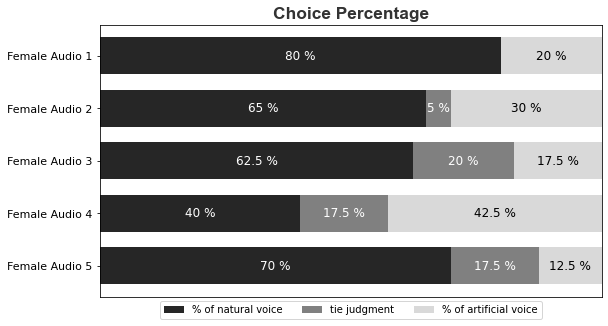

In [17]:
category_names = ['% of natural voice', 'tie judgment','% of artificial voice']

results = data_ber_graph2.iloc[0:5].set_index('Audio_choice').T.to_dict('list')

fig, ax = survey(results, category_names)

ax.set_title('Choice Percentage',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
ax.set_yticklabels(['Female Audio 1','Female Audio 2','Female Audio 3','Female Audio 4','Female Audio 5'],size=11)

#'Male Audio 1','Male Audio 2','Male Audio 3','Male Audio 4','Male Audio 5'

plt.show()
#plt.savefig('Choice Percentage Female.png')

<ipython-input-18-73501ffe0f2c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Male Audio 1','Male Audio 2','Male Audio 3','Male Audio 4','Male Audio 5'],size=11)


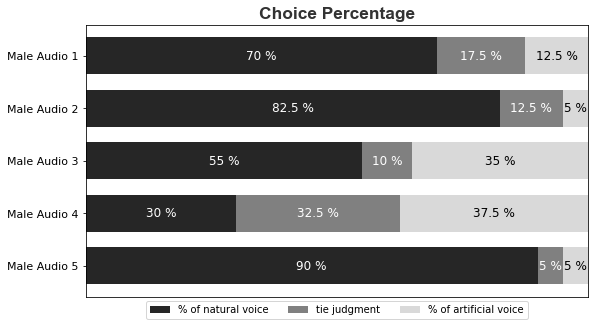

In [18]:
category_names = ['% of natural voice', 'tie judgment','% of artificial voice']

results = data_ber_graph2.iloc[5:].set_index('Audio_choice').T.to_dict('list')

fig, ax = survey(results, category_names)

ax.set_title('Choice Percentage',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
ax.set_yticklabels(['Male Audio 1','Male Audio 2','Male Audio 3','Male Audio 4','Male Audio 5'],size=11)

#'Male Audio 1','Male Audio 2','Male Audio 3','Male Audio 4','Male Audio 5'

plt.show()
#plt.savefig('Choice Percentage Male.png')

<a id = "section_MOS"></a>

## Mean Opinion Score

[Volver a TOC](#section_toc)

In [19]:
data_MOS = data.drop(index_col,axis = 1)
data_MOS = data_MOS.drop(['Rango_de_edad','Estudios_académicos','Nivel_de_Inglés'],axis = 1)
data_MOS.head()

,Marca_temporal,Pronunciation_female_artificial_voice1,Accentuation_female_artificial_voice1,Naturalness_female_artificial_voice1,Cadence_female_artificial_voice1,Pronunciation_female_natural_voice1,Accentuation_female_natural_voice1,Naturalness_female_natural_voice1,Cadence_female_natural_voice1,Pronunciation_male_artificial_voice5,...,Naturalness_female_natural_voice3,Cadence_female_natural_voice3,Pronunciation_male_natural_voice2,Accentuation_male_natural_voice2,Naturalness_male_natural_voice2,Cadence_male_natural_voice2,Pronunciation_male_artificial_voice2,Accentuation_male_artificial_voice2,Naturalness_male_artificial_voice2,Cadence_male_artificial_voice2
0,2021-05-25 15:40:57.253,3,3,4,3,4,4,3,4,3,...,3,3,3,3,4,3,4,4,4,4
1,2021-05-25 15:43:26.070,3,2,2,2,3,3,3,3,3,...,3,5,5,5,4,5,3,4,4,5
2,2021-05-25 15:54:21.380,5,5,2,1,5,4,4,4,3,...,4,3,5,4,5,5,5,5,1,4
3,2021-05-25 16:16:14.014,5,5,3,3,5,5,5,5,5,...,3,4,5,5,5,5,5,5,3,3
4,2021-05-25 16:28:12.733,3,5,2,3,3,5,4,5,5,...,5,5,5,5,5,5,5,4,4,5


In [20]:
columns = data_MOS.columns[1:]

In [21]:
data_MOS_tidy = pd.melt(data_MOS, id_vars = ['Marca_temporal'], value_vars = columns, 
                        var_name='Subjective_parameter', value_name='Puntuation')

data_MOS_tidy = data_MOS_tidy.sort_values(by=['Subjective_parameter'])
data_MOS_tidy

,Marca_temporal,Subjective_parameter,Puntuation
79,2021-05-30 09:41:10.254,Accentuation_female_artificial_voice1,5
56,2021-05-25 18:17:01.189,Accentuation_female_artificial_voice1,5
55,2021-05-25 17:59:22.188,Accentuation_female_artificial_voice1,4
54,2021-05-25 17:54:55.587,Accentuation_female_artificial_voice1,4
53,2021-05-25 17:35:02.892,Accentuation_female_artificial_voice1,5
...,...,...,...
496,2021-05-25 18:17:01.189,Pronunciation_male_natural_voice5,5
497,2021-05-25 18:17:03.440,Pronunciation_male_natural_voice5,5
498,2021-05-25 18:27:50.926,Pronunciation_male_natural_voice5,3
491,2021-05-25 17:14:47.611,Pronunciation_male_natural_voice5,5


In [22]:
data_MOS_tidy = data_MOS_tidy.drop(['Marca_temporal'],axis=1)
data_MOS_tidy.Subjetive_parameter = data_MOS_tidy.Subjective_parameter.apply(str)

<ipython-input-22-acbb1400f134>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_MOS_tidy.Subjetive_parameter = data_MOS_tidy.Subjective_parameter.apply(str)


In [23]:
patron = "(?P<g1>female_artificial_voice\d)|(?P<g2>female_natural_voice\d)|(?P<g3>male_artificial_voice\d)|(?P<g4>male_natural_voice\d)"
regex_voice = re.compile(patron)
data_MOS_tidy["sort"] = data_MOS_tidy.Subjective_parameter.apply(lambda x: regex_voice.search(x))
data_MOS_tidy.sort = data_MOS_tidy.sort.apply(lambda x: x if x is None else x.group())
data_MOS_tidy

,Subjective_parameter,Puntuation,sort
79,Accentuation_female_artificial_voice1,5,female_artificial_voice1
56,Accentuation_female_artificial_voice1,5,female_artificial_voice1
55,Accentuation_female_artificial_voice1,4,female_artificial_voice1
54,Accentuation_female_artificial_voice1,4,female_artificial_voice1
53,Accentuation_female_artificial_voice1,5,female_artificial_voice1
...,...,...,...
496,Pronunciation_male_natural_voice5,5,male_natural_voice5
497,Pronunciation_male_natural_voice5,5,male_natural_voice5
498,Pronunciation_male_natural_voice5,3,male_natural_voice5
491,Pronunciation_male_natural_voice5,5,male_natural_voice5


<a id = "section_statAudio"></a>

## Statistical Parameters Audios

[Volver a TOC](#section_toc)

In [24]:
#data_MOS_tidy = data_MOS_tidy.drop(['type'],axis = 1)

In [25]:
data_MOS_pivot_table = data_MOS_tidy.pivot_table(data_MOS_tidy,index = ['sort','Subjective_parameter'],
                          aggfunc = ['count',np.mean,np.median,mode,np.std,np.min,np.max,
                                     stats.shapiro])


data_MOS_pivot_table[[('statistic','Shapiro'), ('p_value','Shapiro')]] = pd.DataFrame(data_MOS_pivot_table.shapiro.Puntuation.tolist(), 
                                                                                      index=data_MOS_pivot_table.index)

data_MOS_pivot_table = data_MOS_pivot_table.drop(['shapiro'],axis=1)

data_MOS_pivot_table['H0'] = data_MOS_pivot_table.p_value.Shapiro.apply(lambda x: 'rechazo H0' if x < 0.05 else 'No rechazo H0')

data_MOS_pivot_table

count  \
                                                                Puntuation   
sort                     Subjective_parameter                                
female_artificial_voice1 Accentuation_female_artificial_voice1          40   
                         Cadence_female_artificial_voice1               40   
                         Naturalness_female_artificial_voice1           40   
                         Pronunciation_female_artificial_voice1         40   
female_artificial_voice2 Accentuation_female_artificial_voice2          40   
...                                                                    ...   
male_natural_voice4      Pronunciation_male_natural_voice4              40   
male_natural_voice5      Accentuation_male_natural_voice5               40   
                         Cadence_male_natural_voice5                    40   
                         Naturalness_male_natural_voice5                40   
                         Pronunciation_male_natural_voice5              40   

                                                                      mean  \
                                                                Puntuation   
sort                     Subjective_parameter                                
female_artificial_voice1 Accentuation_female_artificial_voice1       3.750   
                         Cadence_female_artificial_voice1            2.875   
                         Naturalness_female_artificial_voice1        2.800   
                         Pronunciation_female_artificial_voice1      4.075   
female_artificial_voice2 Accentuation_female_artificial_voice2       4.050   
...                                                                    ...   
male_natural_voice4      Pronunciation_male_natural_voice4           4.050   
male_natural_voice5      Accentuation_male_natural_voice5            4.275   
                         Cadence_male_natural_voice5                 4.300   
                         Naturalness_male_natural_voice5             4.375   
                         Pronunciation_male_natural_voice5           4.450   

                                                                    median  \
                                                                Puntuation   
sort                     Subjective_parameter                                
female_artificial_voice1 Accentuation_female_artificial_voice1         4.0   
                         Cadence_female_artificial_voice1              3.0   
                         Naturalness_female_artificial_voice1          3.0   
                         Pronunciation_female_artificial_voice1        4.0   
female_artificial_voice2 Accentuation_female_artificial_voice2         4.0   
...                                                                    ...   
male_natural_voice4      Pronunciation_male_natural_voice4             4.0   
male_natural_voice5      Accentuation_male_natural_voice5              4.0   
                         Cadence_male_natural_voice5                   4.0   
                         Naturalness_male_natural_voice5               5.0   
                         Pronunciation_male_natural_voice5             5.0   

                                                                      mode  \
                                                                Puntuation   
sort                     Subjective_parameter                                
female_artificial_voice1 Accentuation_female_artificial_voice1           5   
                         Cadence_female_artificial_voice1                3   
                         Naturalness_female_artificial_voice1            3   
                         Pronunciation_female_artificial_voice1          5   
female_artificial_voice2 Accentuation_female_artificial_voice2           5   
...                                                                    ...   
male_natural_voice4      Pronunciation_male_natural_voice4               5   
male_natur

In [26]:
mask = data_MOS_pivot_table['H0'] == 'rechazo H0'
mask.sum()

80

<a id = "section_femaleArt"></a>

### Female Artificial Audios

[Volver a TOC](#section_toc)

In [27]:
data_female_artificial = data_MOS_pivot_table.loc[['female_artificial_voice1','female_artificial_voice2',
                                                   'female_artificial_voice3','female_artificial_voice4',
                                                   'female_artificial_voice5'],['mean','median','mode','std']]
#data_female_artificial.to_excel('data_female_artificial.xlsx')
data_female_artificial

mean  \
                                                                Puntuation   
sort                     Subjective_parameter                                
female_artificial_voice1 Accentuation_female_artificial_voice1       3.750   
                         Cadence_female_artificial_voice1            2.875   
                         Naturalness_female_artificial_voice1        2.800   
                         Pronunciation_female_artificial_voice1      4.075   
female_artificial_voice2 Accentuation_female_artificial_voice2       4.050   
                         Cadence_female_artificial_voice2            3.875   
                         Naturalness_female_artificial_voice2        3.650   
                         Pronunciation_female_artificial_voice2      4.150   
female_artificial_voice3 Accentuation_female_artificial_voice3       3.700   
                         Cadence_female_artificial_voice3            3.675   
                         Naturalness_female_artificial_voice3        3.100   
                         Pronunciation_female_artificial_voice3      3.875   
female_artificial_voice4 Accentuation_female_artificial_voice4       4.150   
                         Cadence_female_artificial_voice4            3.725   
                         Naturalness_female_artificial_voice4        3.450   
                         Pronunciation_female_artificial_voice4      4.175   
female_artificial_voice5 Accentuation_female_artificial_voice5       3.775   
                         Cadence_female_artificial_voice5            3.300   
                         Naturalness_female_artificial_voice5        2.900   
                         Pronunciation_female_artificial_voice5      3.850   

                                                                    median  \
                                                                Puntuation   
sort                     Subjective_parameter                                
female_artificial_voice1 Accentuation_female_artificial_voice1         4.0   
                         Cadence_female_artificial_voice1              3.0   
                         Naturalness_female_artificial_voice1          3.0   
                         Pronunciation_female_artificial_voice1        4.0   
female_artificial_voice2 Accentuation_female_artificial_voice2         4.0   
                         Cadence_female_artificial_voice2              4.0   
                         Naturalness_female_artificial_voice2          4.0   
                         Pronunciation_female_artificial_voice2        4.0   
female_artificial_voice3 Accentuation_female_artificial_voice3         4.0   
                         Cadence_female_artificial_voice3              4.0   
                         Naturalness_female_artificial_voice3          3.0   
                         Pronunciation_female_artificial_voice3        4.0   
female_artificial_voice4 Accentuation_female_artificial_voice4         4.0   
                         Cadence_female_artificial_voice4              4.0   
                         Naturalness_female_artificial_voice4          3.5   
                         Pronunciation_female_artificial_voice4        5.0   
female_artificial_voice5 Accentuation_female_artificial_voice5         4.0   
                         Cadence_female_artificial_voice5              3.0   
                         Naturalness_female_artificial_voice5          3.0   
                         Pronunciation_female_artificial_voice5        4.0   

                                                                      mode  \
                                                                Puntuation   
sort                     Subjective_parameter                                
female_artificial_voice1 Accentuation_female_artificial_voice1           5   
                         Cadence_female_artificial_voice1                3   
                         Naturalness_female_artificial_voice1            3   
            

In [28]:
data_female_artificial = data_female_artificial.reset_index(level=[0,1])
data_female_artificial.columns = ['_'.join(col) for col in data_female_artificial.columns.values]

In [29]:
columns = ['sort','Subjective_parameter','Mean','Median','Mode','Std']
data_female_artificial.columns = columns

In [30]:
data_female_artificial.head()

,sort,Subjective_parameter,Mean,Median,Mode,Std
0,female_artificial_voice1,Accentuation_female_artificial_voice1,3.750,4.0,5,1.080123
1,female_artificial_voice1,Cadence_female_artificial_voice1,2.875,3.0,3,1.180775
2,female_artificial_voice1,Naturalness_female_artificial_voice1,2.800,3.0,3,0.966092
3,female_artificial_voice1,Pronunciation_female_artificial_voice1,4.075,4.0,5,0.997111
4,female_artificial_voice2,Accentuation_female_artificial_voice2,4.050,4.0,5,1.036513


In [31]:
patron = "(?P<g1>Accentuation)|(?P<g2>Cadence)|(?P<g3>Naturalness)|(?P<g4>Pronunciation)"
regex_subj_para = re.compile(patron)
data_female_artificial["Subjective_parameter"] = data_female_artificial.Subjective_parameter.apply(lambda x: regex_subj_para.search(x))
data_female_artificial.Subjective_parameter = data_female_artificial.Subjective_parameter.apply(lambda x: x if x is None else x.group())
data_female_artificial.head()

,sort,Subjective_parameter,Mean,Median,Mode,Std
0,female_artificial_voice1,Accentuation,3.750,4.0,5,1.080123
1,female_artificial_voice1,Cadence,2.875,3.0,3,1.180775
2,female_artificial_voice1,Naturalness,2.800,3.0,3,0.966092
3,female_artificial_voice1,Pronunciation,4.075,4.0,5,0.997111
4,female_artificial_voice2,Accentuation,4.050,4.0,5,1.036513


<a id = "section_femaleNat"></a>

### Female Natural Audios

[Volver a TOC](#section_toc)

In [32]:
data_female_natural = data_MOS_pivot_table.loc[['female_natural_voice1','female_natural_voice2',
                                                   'female_natural_voice3','female_natural_voice4',
                                                   'female_natural_voice5'],['mean','median','mode','std']]
data_female_natural.to_excel('data_female_natural.xlsx')

In [33]:
data_female_natural = data_female_natural.reset_index(level=[0,1])
data_female_natural.columns = ['_'.join(col) for col in data_female_natural.columns.values]
data_female_natural.columns = columns

In [34]:
data_female_natural.head()

,sort,Subjective_parameter,Mean,Median,Mode,Std
0,female_natural_voice1,Accentuation_female_natural_voice1,4.300,4.0,5,0.790975
1,female_natural_voice1,Cadence_female_natural_voice1,4.000,4.0,4,0.905822
2,female_natural_voice1,Naturalness_female_natural_voice1,4.150,4.0,5,0.921259
3,female_natural_voice1,Pronunciation_female_natural_voice1,4.475,5.0,5,0.715667
4,female_natural_voice2,Accentuation_female_natural_voice2,4.050,4.0,5,1.084861


In [35]:
data_female_natural["Subjective_parameter"] = data_female_natural.Subjective_parameter.apply(lambda x: regex_subj_para.search(x))
data_female_natural.Subjective_parameter = data_female_natural.Subjective_parameter.apply(lambda x: x if x is None else x.group())
data_female_natural.head()

,sort,Subjective_parameter,Mean,Median,Mode,Std
0,female_natural_voice1,Accentuation,4.300,4.0,5,0.790975
1,female_natural_voice1,Cadence,4.000,4.0,4,0.905822
2,female_natural_voice1,Naturalness,4.150,4.0,5,0.921259
3,female_natural_voice1,Pronunciation,4.475,5.0,5,0.715667
4,female_natural_voice2,Accentuation,4.050,4.0,5,1.084861


<a id = "section_graphicsFemale"></a>

#### Graphics Female

[Volver a TOC](#section_toc)

<ipython-input-36-1ed5f2522ba4>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['Accentuation','Cadence','Naturalness','Pronunciation'],size=12)
<ipython-input-36-1ed5f2522ba4>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(['Accentuation','Cadence','Naturalness','Pronunciation'],size=12)


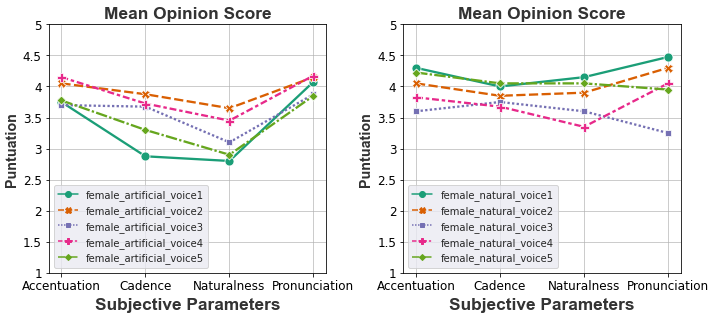

In [36]:
dims = (10,4.5)
fig,ax = plt.subplots(figsize=dims ,ncols=2)# ,ncols=2
with sns.axes_style('darkgrid'):
    g = sns.lineplot(x ='Subjective_parameter',y = 'Mean',hue='sort',style='sort',data=data_female_artificial,
                     ax=ax[0],linewidth=2.3,markers=True,markersize=9,palette='Dark2')  #style='sort' linewidth=2.3,markers=True,markersize=9
    g.set_xlabel('Subjective Parameters',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_ylabel('Puntuation',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_title('Mean Opinion Score',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
    g.set_xticklabels(['Accentuation','Cadence','Naturalness','Pronunciation'],size=12)
    g.set_yticklabels(['1','1.5','2','2.5','3','3.5','4','4.5','5'],size=12)
    g.legend()
    g.grid(alpha=0.8)
    
    h = sns.lineplot(x ='Subjective_parameter',y = 'Mean',hue='sort',style='sort',data=data_female_natural,
                     ax=ax[1],linewidth=2.3,markers=True,markersize=9,palette='Dark2') #style='sort'linewidth=2.3,markers=True,markersize=9
    h.set_xlabel('Subjective Parameters',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    h.set_ylabel('Puntuation',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    h.set_title('Mean Opinion Score',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    h.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
    h.set_xticklabels(['Accentuation','Cadence','Naturalness','Pronunciation'],size=12)
    h.set_yticklabels(['1','1.5','2','2.5','3','3.5','4','4.5','5'],size=12)
    h.legend() #bbox_to_anchor=(0.99, 0.32)
    h.grid(alpha=0.8)
    
   
    plt.tight_layout()
   # plt.savefig("MOS female.png")

<a id = "section_maleArt"></a>

### Male Artificial Audios

[Volver a TOC](#section_toc)

In [37]:
data_male_artificial = data_MOS_pivot_table.loc[['male_artificial_voice1','male_artificial_voice2',
                                                   'male_artificial_voice3','male_artificial_voice4',
                                                   'male_artificial_voice5'],['mean','median','mode','std']]
data_male_artificial
#data_male_artificial.to_excel('data_male_artificial.xlsx')

mean  \
                                                            Puntuation   
sort                   Subjective_parameter                              
male_artificial_voice1 Accentuation_male_artificial_voice1       3.900   
                       Cadence_male_artificial_voice1            3.900   
                       Naturalness_male_artificial_voice1        3.775   
                       Pronunciation_male_artificial_voice1      4.100   
male_artificial_voice2 Accentuation_male_artificial_voice2       3.775   
                       Cadence_male_artificial_voice2            3.575   
                       Naturalness_male_artificial_voice2        3.075   
                       Pronunciation_male_artificial_voice2      3.950   
male_artificial_voice3 Accentuation_male_artificial_voice3       4.225   
                       Cadence_male_artificial_voice3            3.950   
                       Naturalness_male_artificial_voice3        3.900   
                       Pronunciation_male_artificial_voice3      4.175   
male_artificial_voice4 Accentuation_male_artificial_voice4       4.275   
                       Cadence_male_artificial_voice4            3.900   
                       Naturalness_male_artificial_voice4        4.050   
                       Pronunciation_male_artificial_voice4      4.300   
male_artificial_voice5 Accentuation_male_artificial_voice5       3.825   
                       Cadence_male_artificial_voice5            3.525   
                       Naturalness_male_artificial_voice5        2.950   
                       Pronunciation_male_artificial_voice5      3.900   

                                                                median  \
                                                            Puntuation   
sort                   Subjective_parameter                              
male_artificial_voice1 Accentuation_male_artificial_voice1         4.0   
                       Cadence_male_artificial_voice1              4.0   
                       Naturalness_male_artificial_voice1          4.0   
                       Pronunciation_male_artificial_voice1        5.0   
male_artificial_voice2 Accentuation_male_artificial_voice2         4.0   
                       Cadence_male_artificial_voice2              4.0   
                       Naturalness_male_artificial_voice2          3.0   
                       Pronunciation_male_artificial_voice2        4.5   
male_artificial_voice3 Accentuation_male_artificial_voice3         4.0   
                       Cadence_male_artificial_voice3              4.0   
                       Naturalness_male_artificial_voice3          4.0   
                       Pronunciation_male_artificial_voice3        4.5   
male_artificial_voice4 Accentuation_male_artificial_voice4         4.5   
                       Cadence_male_artificial_voice4              4.0   
                       Naturalness_male_artificial_voice4          4.0   
                       Pronunciation_male_artificial_voice4        5.0   
male_artificial_voice5 Accentuation_male_artificial_voice5         4.0   
                       Cadence_male_artificial_voice5              3.0   
                       Naturalness_male_artificial_voice5          3.0   
                       Pronunciation_male_artificial_voice5        4.0   

                                                                  mode  \
                                                            Puntuation   
sort                   Subjective_parameter                              
male_artificial_voice1 Accentuation_male_artificial_voice1           5   
                       Cadence_male_artificial_voice1                5   
                       Naturalness_male_artificial_voice1            4   
                       Pronunciation_male_artificial_voice1          5   
male_artificial_voice2 Accentuation_male_artificial_voice2           5   
                       Cadence_male_artificial_voice2               

In [38]:
data_male_artificial = data_male_artificial.reset_index(level=[0,1])
data_male_artificial.columns = ['_'.join(col) for col in data_male_artificial.columns.values]
data_male_artificial.columns = columns

In [39]:
data_male_artificial.head()

,sort,Subjective_parameter,Mean,Median,Mode,Std
0,male_artificial_voice1,Accentuation_male_artificial_voice1,3.900,4.0,5,1.057331
1,male_artificial_voice1,Cadence_male_artificial_voice1,3.900,4.0,5,1.032796
2,male_artificial_voice1,Naturalness_male_artificial_voice1,3.775,4.0,4,1.073874
3,male_artificial_voice1,Pronunciation_male_artificial_voice1,4.100,5.0,5,1.150251
4,male_artificial_voice2,Accentuation_male_artificial_voice2,3.775,4.0,5,1.250385


In [40]:
data_male_artificial["Subjective_parameter"] = data_male_artificial.Subjective_parameter.apply(lambda x: regex_subj_para.search(x))
data_male_artificial.Subjective_parameter = data_male_artificial.Subjective_parameter.apply(lambda x: x if x is None else x.group())
data_male_artificial.head()

,sort,Subjective_parameter,Mean,Median,Mode,Std
0,male_artificial_voice1,Accentuation,3.900,4.0,5,1.057331
1,male_artificial_voice1,Cadence,3.900,4.0,5,1.032796
2,male_artificial_voice1,Naturalness,3.775,4.0,4,1.073874
3,male_artificial_voice1,Pronunciation,4.100,5.0,5,1.150251
4,male_artificial_voice2,Accentuation,3.775,4.0,5,1.250385


<a id = "section_maleNat"></a>

### Male Natural Audios

[Volver a TOC](#section_toc)

In [41]:
data_male_natural = data_MOS_pivot_table.loc[['male_natural_voice1','male_natural_voice2',
                                                   'male_natural_voice3','male_natural_voice4',
                                                   'male_natural_voice5'],['mean','median','mode','std']]
data_male_natural
data_male_natural.to_excel('data_male_natural.xlsx')

In [42]:
data_male_natural = data_male_natural.reset_index(level=[0,1])
data_male_natural.columns = ['_'.join(col) for col in data_male_natural.columns.values]
data_male_natural.columns = columns

In [43]:
data_male_natural.head()

,sort,Subjective_parameter,Mean,Median,Mode,Std
0,male_natural_voice1,Accentuation_male_natural_voice1,4.250,5.0,5,0.980581
1,male_natural_voice1,Cadence_male_natural_voice1,4.225,4.0,5,0.861945
2,male_natural_voice1,Naturalness_male_natural_voice1,4.075,4.0,5,1.071484
3,male_natural_voice1,Pronunciation_male_natural_voice1,4.400,5.0,5,0.955416
4,male_natural_voice2,Accentuation_male_natural_voice2,4.250,5.0,5,0.980581


In [44]:
data_male_natural["Subjective_parameter"] = data_male_natural.Subjective_parameter.apply(lambda x: regex_subj_para.search(x))
data_male_natural.Subjective_parameter = data_male_natural.Subjective_parameter.apply(lambda x: x if x is None else x.group())
data_male_natural.head()

,sort,Subjective_parameter,Mean,Median,Mode,Std
0,male_natural_voice1,Accentuation,4.250,5.0,5,0.980581
1,male_natural_voice1,Cadence,4.225,4.0,5,0.861945
2,male_natural_voice1,Naturalness,4.075,4.0,5,1.071484
3,male_natural_voice1,Pronunciation,4.400,5.0,5,0.955416
4,male_natural_voice2,Accentuation,4.250,5.0,5,0.980581


<a id = "section_graphicsMale"></a>

#### Graphics Male

[Volver a TOC](#section_toc)

<ipython-input-45-4a42896e070b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['Accentuation','Cadence','Naturalness','Pronunciation'],size=12)
<ipython-input-45-4a42896e070b>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(['Accentuation','Cadence','Naturalness','Pronunciation'],size=12)


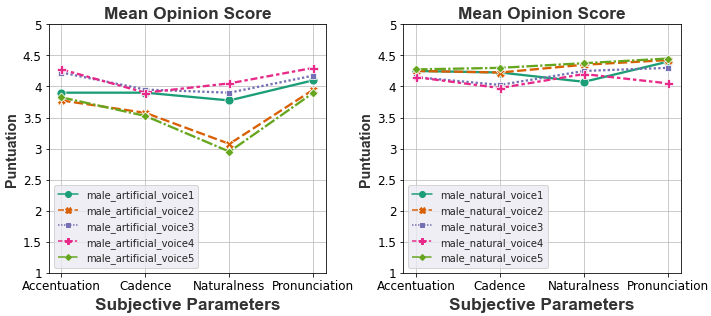

In [45]:
dims = (10,4.5)
fig,ax = plt.subplots(figsize=dims,ncols=2)
with sns.axes_style('darkgrid'):
    g = sns.lineplot(x ='Subjective_parameter',y = 'Mean',hue='sort',style='sort',data=data_male_artificial,
                     ax=ax[0],linewidth=2.3,markers=True,markersize=9,palette='Dark2') #style='Type',palette=['#DB845B', '#5B73DB']
    g.set_xlabel('Subjective Parameters',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_ylabel('Puntuation',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_title('Mean Opinion Score',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
    g.set_xticklabels(['Accentuation','Cadence','Naturalness','Pronunciation'],size=12)
    g.set_yticklabels(['1','1.5','2','2.5','3','3.5','4','4.5','5'],size=12)
    g.legend()
    g.grid(alpha=0.8)
    
    h = sns.lineplot(x ='Subjective_parameter',y = 'Mean',hue='sort',style='sort',data=data_male_natural,
                     ax=ax[1],linewidth=2.3,markers=True,markersize=9,palette='Dark2')
    h.set_xlabel('Subjective Parameters',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    h.set_ylabel('Puntuation',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    h.set_title('Mean Opinion Score',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    h.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
    h.set_xticklabels(['Accentuation','Cadence','Naturalness','Pronunciation'],size=12)
    h.set_yticklabels(['1','1.5','2','2.5','3','3.5','4','4.5','5'],size=12)
    h.legend()
    h.grid(alpha=0.8)
    plt.tight_layout()
    #plt.savefig("MOS male.png")

<a id = "section_correlation"></a>

## Correlation

[Volver a TOC](#section_toc)

In [46]:
data_male = pd.concat([data_male_artificial,data_male_natural],ignore_index = True)
data_male.head()

,sort,Subjective_parameter,Mean,Median,Mode,Std
0,male_artificial_voice1,Accentuation,3.900,4.0,5,1.057331
1,male_artificial_voice1,Cadence,3.900,4.0,5,1.032796
2,male_artificial_voice1,Naturalness,3.775,4.0,4,1.073874
3,male_artificial_voice1,Pronunciation,4.100,5.0,5,1.150251
4,male_artificial_voice2,Accentuation,3.775,4.0,5,1.250385


In [47]:
mask = data_male.Subjective_parameter == 'Accentuation'
data_male_accentuation = data_male[mask]
data_male_accentuation.reset_index(inplace=True,drop = True)
data_male_accentuation

,sort,Subjective_parameter,Mean,Median,Mode,Std
0,male_artificial_voice1,Accentuation,3.900,4.0,5,1.057331
1,male_artificial_voice2,Accentuation,3.775,4.0,5,1.250385
2,male_artificial_voice3,Accentuation,4.225,4.0,5,0.831665
3,male_artificial_voice4,Accentuation,4.275,4.5,5,0.905468
4,male_artificial_voice5,Accentuation,3.825,4.0,5,1.083383
5,male_natural_voice1,Accentuation,4.250,5.0,5,0.980581
6,male_natural_voice2,Accentuation,4.250,5.0,5,0.980581
7,male_natural_voice3,Accentuation,4.150,4.5,5,0.975337
8,male_natural_voice4,Accentuation,4.150,4.0,5,0.975337
9,male_natural_voice5,Accentuation,4.275,4.0,5,0.715667


In [48]:
mask = data_male.Subjective_parameter == 'Pronunciation'
data_male_pronunciation = data_male[mask]
data_male_pronunciation.reset_index(inplace=True,drop = True)

In [49]:
mask = data_male.Subjective_parameter == 'Cadence'
data_male_cadence = data_male[mask]
data_male_cadence.reset_index(inplace=True,drop = True)

In [50]:
mask = data_male.Subjective_parameter == 'Naturalness'
data_male_naturalness = data_male[mask]
data_male_naturalness.reset_index(inplace=True,drop = True)

In [51]:
data_pitch = pd.read_excel(r'C:\Users\Lean\Desktop\Deep Learning - Audio\Sato Test Subjetivo\Data audios\Analisis Estadistico Objetivo Audios.xlsx', 
                     sheet_name='Masculine_graph')
data_pitch.sort_values(by=['Type'],inplace = True)
data_pitch.reset_index(inplace=True,drop = True)
#data_pitch.to_excel('pitch_male.xlsx')

In [52]:
rho_art_male, pval_art_male = stats.spearmanr(data_pitch.Average.iloc[:5].values.reshape(-1,1), 
                            data_male_accentuation.Mean.iloc[:5].values.reshape(-1,1))
rho_art_male2, pval_art_male2 = stats.spearmanr(data_pitch.Average.iloc[:5].values.reshape(-1,1), 
                              data_male_cadence.Mean.iloc[:5].values.reshape(-1,1))
rho_art_male3, pval_art_male3 = stats.spearmanr(data_pitch.Average.iloc[:5].values.reshape(-1,1), 
                              data_male_pronunciation.Mean.iloc[:5].values.reshape(-1,1))
rho_art_male4, pval_art_male4 = stats.spearmanr(data_pitch.Average.iloc[:5].values.reshape(-1,1), 
                              data_male_naturalness.Mean.iloc[:5].values.reshape(-1,1))

In [53]:
print(np.round(rho_art_male,4),np.round(pval_art_male,4))
print(np.round(rho_art_male2,4),np.round(pval_art_male2,4))
print(np.round(rho_art_male3,4),np.round(pval_art_male3,4))
print(np.round(rho_art_male4,4),np.round(pval_art_male4,4))

0.6 0.2848
0.6669 0.2189
0.7 0.1881
0.7 0.1881


In [54]:
rho_nat_male, pval_nat_male = stats.spearmanr(data_pitch.Average.iloc[5:].values.reshape(-1,1), 
                                    data_male_accentuation.Mean.iloc[5:].values.reshape(-1,1))
rho_nat_male2, pval_nat_male2 = stats.spearmanr(data_pitch.Average.iloc[5:].values.reshape(-1,1), 
                                      data_male_cadence.Mean.iloc[5:].values.reshape(-1,1))
rho_nat_male3, pval_nat_male3 = stats.spearmanr(data_pitch.Average.iloc[5:].values.reshape(-1,1), 
                                      data_male_pronunciation.Mean.iloc[5:].values.reshape(-1,1))
rho_nat_male4, pval_nat_male4 = stats.spearmanr(data_pitch.Average.iloc[5:].values.reshape(-1,1), 
                                      data_male_naturalness.Mean.iloc[5:].values.reshape(-1,1))

In [55]:
print(np.round(rho_nat_male,4),np.round(pval_nat_male,4))
print(np.round(rho_nat_male2,4),np.round(pval_nat_male2,4))
print(np.round(rho_nat_male3,4),np.round(pval_nat_male3,4))
print(np.round(rho_nat_male4,4),np.round(pval_nat_male4,4))

-0.7379 0.1546
-0.8208 0.0886
-0.9 0.0374
-0.9 0.0374


In [56]:
data_pitch_female = pd.read_excel(r'C:\Users\Lean\Desktop\Deep Learning - Audio\Sato Test Subjetivo\Data audios\Analisis Estadistico Objetivo Audios.xlsx', 
                     sheet_name='Female_graph')
data_pitch_female.sort_values(by=['Type'],inplace = True)
data_pitch_female.reset_index(inplace=True,drop = True)
data_pitch_female.dropna(axis=1, how='all',inplace = True)
#data_pitch_female.to_excel('pitch_female.xlsx')

In [57]:
data_female = pd.concat([data_female_artificial,data_female_natural],ignore_index = True)
data_female.head()

,sort,Subjective_parameter,Mean,Median,Mode,Std
0,female_artificial_voice1,Accentuation,3.750,4.0,5,1.080123
1,female_artificial_voice1,Cadence,2.875,3.0,3,1.180775
2,female_artificial_voice1,Naturalness,2.800,3.0,3,0.966092
3,female_artificial_voice1,Pronunciation,4.075,4.0,5,0.997111
4,female_artificial_voice2,Accentuation,4.050,4.0,5,1.036513


In [58]:
mask = data_female.Subjective_parameter == 'Accentuation'
data_female_accentuation = data_female[mask]
data_female_accentuation.reset_index(inplace=True,drop = True)
data_female_accentuation.head()

,sort,Subjective_parameter,Mean,Median,Mode,Std
0,female_artificial_voice1,Accentuation,3.750,4.0,5,1.080123
1,female_artificial_voice2,Accentuation,4.050,4.0,5,1.036513
2,female_artificial_voice3,Accentuation,3.700,4.0,4,1.017790
3,female_artificial_voice4,Accentuation,4.150,4.0,5,0.921259
4,female_artificial_voice5,Accentuation,3.775,4.0,4,0.999679


In [59]:
mask = data_female.Subjective_parameter == 'Cadence'
data_female_cadence = data_female[mask]
data_female_cadence.reset_index(inplace=True,drop = True)
#data_female_cadence

In [60]:
mask = data_female.Subjective_parameter == 'Pronunciation'
data_female_pronunciation = data_female[mask]
data_female_pronunciation.reset_index(inplace=True,drop = True)

In [61]:
mask = data_female.Subjective_parameter == 'Naturalness'
data_female_naturalness = data_female[mask]
data_female_naturalness.reset_index(inplace=True,drop = True)

In [62]:
rho_art_female, pval_art_female = stats.spearmanr(data_pitch_female.Average.iloc[:5].values.reshape(-1,1), 
                            data_female_accentuation.Mean.iloc[:5].values.reshape(-1,1))
rho_art_female2, pval_art_female2 = stats.spearmanr(data_pitch_female.Average.iloc[:5].values.reshape(-1,1), 
                              data_female_cadence.Mean.iloc[:5].values.reshape(-1,1))
rho_art_female3, pval_art_female3 = stats.spearmanr(data_pitch_female.Average.iloc[:5].values.reshape(-1,1), 
                              data_female_pronunciation.Mean.iloc[:5].values.reshape(-1,1))
rho_art_female4, pval_art_female4 = stats.spearmanr(data_pitch_female.Average.iloc[:5].values.reshape(-1,1), 
                              data_female_naturalness.Mean.iloc[:5].values.reshape(-1,1))

In [63]:
print(np.round(rho_art_female,4),np.round(pval_art_female,4))
print(np.round(rho_art_female2,4),np.round(pval_art_female2,4))
print(np.round(rho_art_female3,4),np.round(pval_art_female3,4))
print(np.round(rho_art_female4,4),np.round(pval_art_female4,4))

-0.6 0.2848
0.2 0.7471
-0.5 0.391
0.2 0.7471


In [64]:
rho_nat_female, pval_nat_female = stats.spearmanr(data_pitch_female.Average.iloc[5:].values.reshape(-1,1), 
                                    data_female_accentuation.Mean.iloc[5:].values.reshape(-1,1))
rho_nat_female2, pval_nat_female2 = stats.spearmanr(data_pitch_female.Average.iloc[5:].values.reshape(-1,1), 
                                      data_female_cadence.Mean.iloc[5:].values.reshape(-1,1))
rho_nat_female3, pval_nat_female3 = stats.spearmanr(data_pitch_female.Average.iloc[5:].values.reshape(-1,1), 
                                      data_female_pronunciation.Mean.iloc[5:].values.reshape(-1,1))
rho_nat_female4, pval_nat_female4 = stats.spearmanr(data_pitch_female.Average.iloc[5:].values.reshape(-1,1), 
                                      data_female_naturalness.Mean.iloc[5:].values.reshape(-1,1))

In [65]:
print(np.round(rho_nat_female,4),np.round(pval_nat_female,4))
print(np.round(rho_nat_female2,4),np.round(pval_nat_female2,4))
print(np.round(rho_nat_female3,4),np.round(pval_nat_female3,4))
print(np.round(rho_nat_female4,4),np.round(pval_nat_female4,4))

-0.3 0.6238
0.3 0.6238
-0.8 0.1041
-0.1 0.8729


In [66]:
df = pd.DataFrame({'rho': [rho_art_male,rho_art_male2,rho_art_male3,rho_art_male4,
                         rho_nat_male,rho_nat_male2,rho_nat_male3,rho_nat_male4,
                        rho_art_female,rho_art_female2,rho_art_female3,rho_art_female4,
                        rho_nat_female,rho_nat_female2,rho_nat_female3,rho_nat_female4],
                 'p-value': [pval_art_male,pval_art_male2,pval_art_male3,pval_art_male4,
                           pval_nat_male,pval_nat_male2,pval_nat_male3,pval_nat_male4,
                           pval_art_female,pval_art_female2,pval_art_female3,pval_art_female4,
                           pval_nat_female,pval_nat_female2,pval_nat_female3,pval_nat_female4]})
df.head()

,rho,p-value
0,0.600000,0.284757
1,0.666886,0.218894
2,0.700000,0.188120
3,0.700000,0.188120
4,-0.737865,0.154619


In [67]:
def function(df):
    sub = []
    for i in range(0,len(df)):
        if i == 0 or (i-4)%4 == 0:
            sub.append('Accentuation')
        elif i == 1 or (i-5)%4 == 0:
            sub.append('Cadence')
        elif i == 2 or (i-6)%4 == 0:
            sub.append('Pronunciation')
        else:
            sub.append('Naturalness')
    return sub

In [68]:
df['gender'] = ['Male' if i < 8 else 'Female' for i in range(0,len(df))]
df['type'] = ['Artificial' if i < 4 or 7 < i < 12 else 'Natural' for i in range(0,len(df))]
df['Subjective_parameter'] = None
df['Subjective_parameter'] = df.apply(lambda x: function(df = x))
#df.to_excel('correlation_spearman.xlsx')
df.head()

,rho,p-value,gender,type,Subjective_parameter
0,0.600000,0.284757,Male,Artificial,Accentuation
1,0.666886,0.218894,Male,Artificial,Cadence
2,0.700000,0.188120,Male,Artificial,Pronunciation
3,0.700000,0.188120,Male,Artificial,Naturalness
4,-0.737865,0.154619,Male,Natural,Accentuation
